# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
from tensorflow.python.client import device_lib
import torch

print(f"Torch GPU: {torch.cuda.is_available()}")

print(device_lib.list_local_devices())

Torch GPU: True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17365768420101971248
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10087235584
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5566283716835221236
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:26:00.0, compute capability: 8.6"
]


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

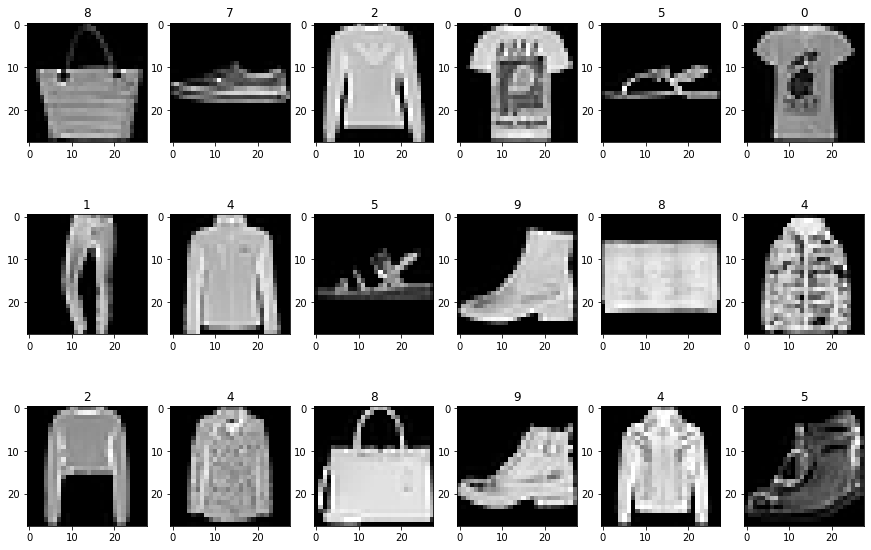

In [4]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [5]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [6]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [7]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 12s 5ms/step - loss: 0.3937 - accuracy: 0.8625 - val_loss: 0.3263 - val_accuracy: 0.8814
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2703 - accuracy: 0.9039 - val_loss: 0.2922 - val_accuracy: 0.8938
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2322 - accuracy: 0.9164 - val_loss: 0.3055 - val_accuracy: 0.8941
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2027 - accuracy: 0.9258 - val_loss: 0.3040 - val_accuracy: 0.8957
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1805 - accuracy: 0.9342 - val_loss: 0.3068 - val_accuracy: 0.8998
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1622 - accuracy: 0.9405 - val_loss: 0.3065 - val_accuracy: 0.9006
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1453 - accuracy: 0.9464 - val_loss: 0.3330 - val_accuracy: 0.8960
Epoch

Train Acc      0.9948499798774719
Validation Acc 0.8815000057220459


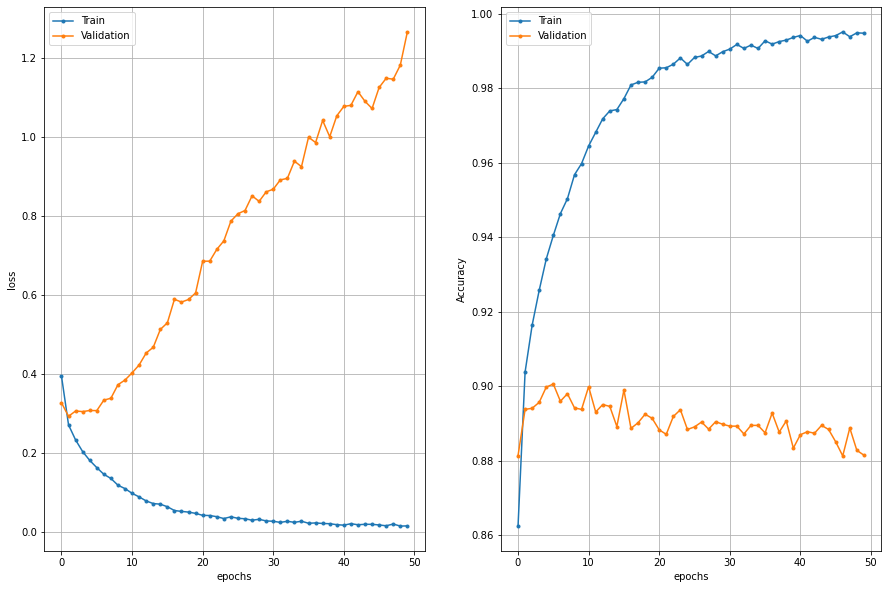

In [8]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [9]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.33)(net)
net = BatchNormalization()(net)

net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.33)(net)
net = BatchNormalization()(net)

net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.33)(net)
net = BatchNormalization()(net)

net = Flatten()(net)
net = Dense(200, activation="relu")(net)
net = Dropout(0.2)(net)
outputs = Dense(10, activation="softmax")(net)


model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1849

In [10]:
epochs = 250
batch_size = 512

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/250
118/118 [==============================] - 6s 34ms/step - loss: 0.6922 - accuracy: 0.7435 - val_loss: 2.6093 - val_accuracy: 0.1000
Epoch 2/250
118/118 [==============================] - 3s 27ms/step - loss: 0.4023 - accuracy: 0.8502 - val_loss: 1.5004 - val_accuracy: 0.3695
Epoch 3/250
118/118 [==============================] - 3s 27ms/step - loss: 0.3341 - accuracy: 0.8757 - val_loss: 0.6077 - val_accuracy: 0.7681
Epoch 4/250
118/118 [==============================] - 3s 27ms/step - loss: 0.3000 - accuracy: 0.8890 - val_loss: 0.3700 - val_accuracy: 0.8576
Epoch 5/250
118/118 [==============================] - 3s 27ms/step - loss: 0.2761 - accuracy: 0.8983 - val_loss: 0.2657 - val_accuracy: 0.8992
Epoch 6/250
118/118 [==============================] - 3s 27ms/step - loss: 0.2582 - accuracy: 0.9046 - val_loss: 0.2573 - val_accuracy: 0.9038
Epoch 7/250
118/118 [==============================] - 3s 27ms/step - loss: 0.2442 - accuracy: 0.9083 - val_loss: 0.2541 - val_accuracy:

118/118 [==============================] - 3s 27ms/step - loss: 0.0898 - accuracy: 0.9656 - val_loss: 0.2101 - val_accuracy: 0.9393
Epoch 58/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0903 - accuracy: 0.9661 - val_loss: 0.2089 - val_accuracy: 0.9385
Epoch 59/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0865 - accuracy: 0.9668 - val_loss: 0.2082 - val_accuracy: 0.9392
Epoch 60/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0885 - accuracy: 0.9658 - val_loss: 0.2039 - val_accuracy: 0.9412
Epoch 61/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0896 - accuracy: 0.9655 - val_loss: 0.2034 - val_accuracy: 0.9408
Epoch 62/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0894 - accuracy: 0.9659 - val_loss: 0.2058 - val_accuracy: 0.9391
Epoch 63/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0869 - accuracy: 0.9676 - val_loss: 0.1992 - val_accuracy: 0.940

118/118 [==============================] - 3s 27ms/step - loss: 0.0560 - accuracy: 0.9789 - val_loss: 0.2437 - val_accuracy: 0.9409
Epoch 114/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0563 - accuracy: 0.9794 - val_loss: 0.2326 - val_accuracy: 0.9405
Epoch 115/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0574 - accuracy: 0.9788 - val_loss: 0.2343 - val_accuracy: 0.9422
Epoch 116/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0574 - accuracy: 0.9784 - val_loss: 0.2312 - val_accuracy: 0.9424
Epoch 117/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0560 - accuracy: 0.9789 - val_loss: 0.2375 - val_accuracy: 0.9412
Epoch 118/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0540 - accuracy: 0.9801 - val_loss: 0.2472 - val_accuracy: 0.9418
Epoch 119/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0527 - accuracy: 0.9802 - val_loss: 0.2407 - val_accuracy:

118/118 [==============================] - 3s 27ms/step - loss: 0.0437 - accuracy: 0.9844 - val_loss: 0.2497 - val_accuracy: 0.9447
Epoch 170/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0432 - accuracy: 0.9840 - val_loss: 0.2477 - val_accuracy: 0.9415
Epoch 171/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0430 - accuracy: 0.9844 - val_loss: 0.2513 - val_accuracy: 0.9414
Epoch 172/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0425 - accuracy: 0.9843 - val_loss: 0.2554 - val_accuracy: 0.9430
Epoch 173/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0393 - accuracy: 0.9855 - val_loss: 0.2499 - val_accuracy: 0.9418
Epoch 174/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0421 - accuracy: 0.9844 - val_loss: 0.2508 - val_accuracy: 0.9430
Epoch 175/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0421 - accuracy: 0.9847 - val_loss: 0.2569 - val_accuracy:

118/118 [==============================] - 3s 27ms/step - loss: 0.0319 - accuracy: 0.9884 - val_loss: 0.2737 - val_accuracy: 0.9444
Epoch 226/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0339 - accuracy: 0.9876 - val_loss: 0.2806 - val_accuracy: 0.9407
Epoch 227/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0335 - accuracy: 0.9883 - val_loss: 0.2589 - val_accuracy: 0.9439
Epoch 228/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0330 - accuracy: 0.9882 - val_loss: 0.2637 - val_accuracy: 0.9441
Epoch 229/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0339 - accuracy: 0.9877 - val_loss: 0.2709 - val_accuracy: 0.9417
Epoch 230/250
118/118 [==============================] - 3s 28ms/step - loss: 0.0360 - accuracy: 0.9869 - val_loss: 0.2510 - val_accuracy: 0.9421
Epoch 231/250
118/118 [==============================] - 3s 27ms/step - loss: 0.0357 - accuracy: 0.9872 - val_loss: 0.2636 - val_accuracy:

Train Acc      0.9885333180427551
Validation Acc 0.9441999793052673


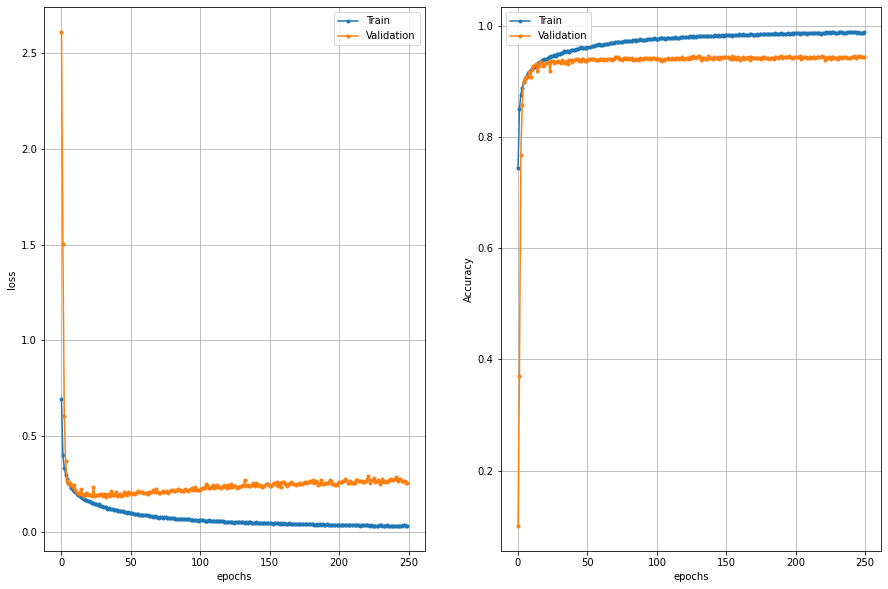

In [11]:
# Show the results
plot_history(history)


### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

## Answers
- I added more conv layers, more epochs, more batch size, Dropuot and Batch normalization

- Data Augmentation didn't help me